# Interactive Acoustic Dissipation 

The purpose of this file is to do some back-of-the-envelope calculations to evaluate the feasibility of locating the hydrophone using acoustic signal strength. 

In [ ]:
%matplotlib widget
from ipywidgets import interact, interactive, fixed, interact_manual
import numpy as np
import matplotlib.pyplot as plt

## Some important background on acoustics
First of all, it is important to note that the the overall equation for a cylindrical signal, estimating the signal strength loss is done in two steps: 

1) Finding transmission loss in dB using the dissipation equation: 
$$ TL = \mathcal{X} \log_{10}(r) + \alpha(f)r $$ 
where $\mathcal{X}$ is the geometric coefficient(20 for deep water, 10 for shallow), r is the range in m, and $\alpha(f)$ is the attenuation coefficient(usually given in dB/km) for a given frequency, found using the plot:

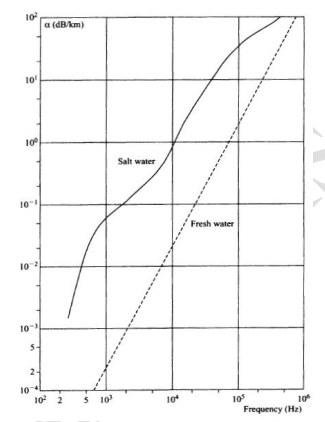


2) Use the decibel relationship to find the actual pressure loss: 

$$ p_{r} = p_{init} * 10^{\frac{TL}{20}} $$

where $p_r$ is the pressure at a distance of r meters and $p_{init}$ is the initial pressure of the wave. That begs the question, how do we find the initial pressure of the wave? 

That brings us to source level, which is a widely used method to quantify the power of an acoustic signal underwater. It represents the sound power in dB relating to a pressure of 1$\mu$Pa at a distance of 1m away. In order to find the source pressure from the source level you can use the equation: 

$$ p_{1m, source} = 1\mu Pa * 10^{\frac{SL}{20}} $$ 

This $p_{1m, source}$ is then the initial pressure for the calculation in #2


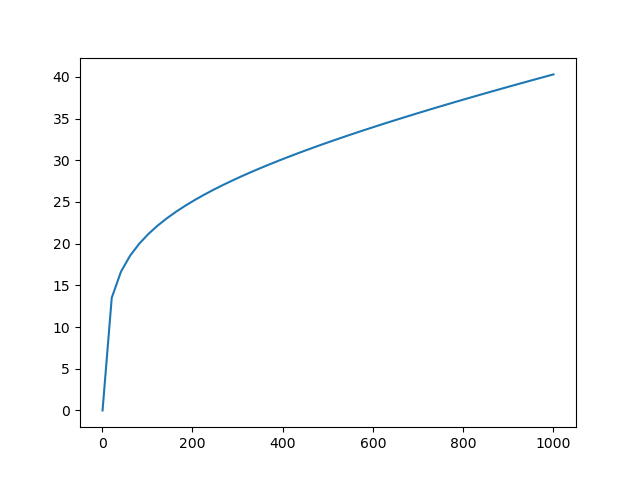

interactive(children=(FloatSlider(value=10.3, description='alpha', max=20.0, min=0.1), IntSlider(value=162, de…

In [ ]:

f = 69 #kHz
alpha_init = 10.3 #(ATTENUATION COEFFICIENT) assumes 69kHz signal in salt water
#note that alpha is in dB/km
r_range = np.linspace(1, 1000) #range in m, going from 0 to 1km away

#NOTE THAT R MUST BE IN METERS
def get_pressure_loss(alpha, r, shallow_water=True):
    if shallow_water:
        return 10 * np.log10(r) + alpha * r * 10**-3
    else:
        return 20 * np.log10(r) + alpha * r * 10**-3

#plot config
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
line, = ax.plot(r_range, get_pressure_loss(alpha_init, r_range))
plt.show()

def plotter(alpha=10.3, source_level=260, shallow_water=True):
    # Redo the calculations
    PL_range = get_pressure_loss(alpha, r_range, shallow_water)
    one_meter_acoustic_pressure = 1e-6 * 10**(source_level/20) #Pa
    final_acoustic_pressure = one_meter_acoustic_pressure * 10 ** (-PL_range / 20)

    #update the plots
    line.set_ydata(final_acoustic_pressure)
    ax.relim()
    ax.autoscale_view()
    ax.semilogy()
    fig.canvas.draw_idle()
    # Print the value halfway through the acoustic pressure array
    mid_idx = len(final_acoustic_pressure) // 2
    print(f"1m acoustic Pressure is: {one_meter_acoustic_pressure}Pa\nThe pressure signal at {r_range[mid_idx]:.1f}m is {np.round(final_acoustic_pressure[mid_idx], 3)}Pa")

interact(plotter, alpha=(0.1,20,0.1), source_level = (136, 162, 1), shallow_water=True);